In [12]:
pip install numpy matplotlib


Step 0/10000: Magnetization = 14
Step 100/10000: Magnetization = 328
Step 200/10000: Magnetization = 258
Step 300/10000: Magnetization = 22
Step 400/10000: Magnetization = 212
Step 500/10000: Magnetization = -180
Step 600/10000: Magnetization = 30
Step 700/10000: Magnetization = -46
Step 800/10000: Magnetization = -94
Step 900/10000: Magnetization = -122
Step 1000/10000: Magnetization = -96
Step 1100/10000: Magnetization = -184
Step 1200/10000: Magnetization = -12
Step 1300/10000: Magnetization = -222
Step 1400/10000: Magnetization = 58
Step 1500/10000: Magnetization = 4
Step 1600/10000: Magnetization = -224
Step 1700/10000: Magnetization = 242
Step 1800/10000: Magnetization = 230
Step 1900/10000: Magnetization = -26
Step 2000/10000: Magnetization = -154
Step 2100/10000: Magnetization = -86
Step 2200/10000: Magnetization = -76
Step 2300/10000: Magnetization = 100
Step 2400/10000: Magnetization = 82
Step 2500/10000: Magnetization = -18
Step 2600/10000: Magnetization = 74
Step 2700/10000

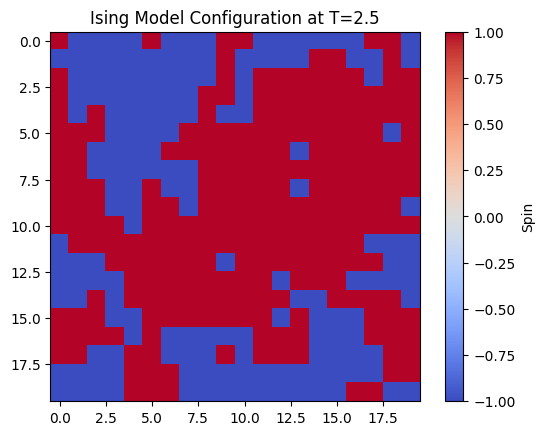

In [13]:
import numpy as np
import matplotlib.pyplot as plt

class IsingModel:
    def __init__(self, L, T, J=1, H=0):
        self.L = L  # Lattice size
        self.T = T  # Temperature
        self.J = J  # Interaction energy
        self.H = H  # External magnetic field
        self.grid = np.random.choice([-1, 1], size=(L, L))  # Initialize the grid with random spins

    def energy(self):
        """Calculate the total energy of the system."""
        E = 0
        for i in range(self.L):
            for j in range(self.L):
                s = self.grid[i, j]
                # Sum interactions with nearest neighbors (periodic boundary conditions)
                E -= self.J * s * (self.grid[(i + 1) % self.L, j] + self.grid[i, (j + 1) % self.L])
                E -= self.H * s  # Include the external field
        return E

    def magnetization(self):
        """Calculate the total magnetization of the system."""
        return np.sum(self.grid)

    def flip_spin(self, i, j):
        """Flip the spin at position (i, j) and return the change in energy."""
        s = self.grid[i, j]
        # Calculate energy change when flipping the spin
        dE = 2 * self.J * s * (self.grid[(i + 1) % self.L, j] + self.grid[i, (j + 1) % self.L] +
                                 self.grid[(i - 1) % self.L, j] + self.grid[i, (j - 1) % self.L]) + 2 * self.H * s
        return dE

    def metropolis_step(self):
        """Perform one Metropolis step."""
        for _ in range(self.L**2):
            i, j = np.random.randint(0, self.L, size=2)  # Choose a random spin
            dE = self.flip_spin(i, j)
            # Accept the new state with a probability
            if dE < 0 or np.random.rand() < np.exp(-dE / self.T):
                self.grid[i, j] *= -1  # Flip the spin

    def simulate(self, steps):
        """Run the simulation for a specified number of steps."""
        for step in range(steps):
            self.metropolis_step()
            if step % 100 == 0:  # Print the progress every 100 steps
                print(f"Step {step}/{steps}: Magnetization = {self.magnetization()}")

    def plot_grid(self):
        """Plot the spin configuration."""
        plt.imshow(self.grid, cmap='coolwarm', interpolation='nearest')
        plt.title(f"Ising Model Configuration at T={self.T}")
        plt.colorbar(label='Spin')
        plt.show()

# Parameters
L = 20  # Lattice size
T = 2.5  # Temperature
steps = 10000  # Number of simulation steps

# Create an Ising model instance and run the simulation
ising_model = IsingModel(L, T)
ising_model.simulate(steps)

# Plot the final configuration
ising_model.plot_grid()
